# Demo_Credit_Risk_Analysis

## Methodology (Deliverable 1 & 2):
**This notebook executes Exploritory Data Analysis and Data Cleaning as described below. This notebook end with the saving of the clean_loans_df as a csv file for follow-on use in preprocessing.**
* Exploritory Data Analysis and Data Cleaning (remove or impute null values)

* Feature selection / engineering: 
    - Drop columns that provide no usefull information for ML
    - Drop (or impute) rows with missing values
    - Examine the target variable (loan_status) and reclassify values as "high risk" and "low risk" <br><br>

* Save resulting dataframe (clean_loans_df) as a csv file for use by all/others<br><br>
Note: The result of feature selection / engineering and data cleaning was the trasformation of a dataset from shape of 115,674, 144 to one of 71,027, 76. This is a loss of 68 columns and 44,648 rows of data


## Import Libraries
Note a new python 3.7 evnironment called mlenv was created for this analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# sklearn dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
# imbalanced-learn dependencies
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler

from imblearn.over_sampling import SMOTE

from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler

from imblearn.combine import SMOTEENN


## Read in the CSV file

In [5]:
# read csv 
# note: the first row is just a comment - it will be skipped (skiprows=1)
# the last two rows are comments - they will be skipped [:-2]
file_path = Path('./Data/LoanStats_2019Q1.csv')
df = pd.read_csv(file_path, skiprows=1)[:-2]
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000.0,20000.0,20000.0,60 months,17.19%,499.10,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,21225.0,21225.0,21225.0,60 months,14.74%,502.05,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000.0,5000.0,5000.0,36 months,17.97%,180.69,D,D1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,20000.0,20000.0,20000.0,36 months,8.19%,628.49,A,A4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,12000.0,12000.0,12000.0,60 months,15.57%,289.09,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115670,NaN,NaN,5000.0,5000.0,5000.0,36 months,13.56%,169.83,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
115671,NaN,NaN,6000.0,6000.0,6000.0,36 months,6.46%,183.79,A,A1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
115672,NaN,NaN,16000.0,16000.0,16000.0,36 months,16.14%,563.62,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
115673,NaN,NaN,16000.0,16000.0,16000.0,60 months,11.31%,350.36,B,B3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


# Exploritory Data Analaysis (EDA)

In [6]:
number_columns = df.shape[1]
print(f"There were {number_columns} columns in the csv file")
# there were 144 columns in the csv file

There were 144 columns in the csv file


## Data Cleaning & Feature Selection

In [7]:
# Note: Columns were screened by stakeholder down to the following list
columns = [
    "loan_amnt", "int_rate", "installment", "home_ownership",
    "annual_inc", "verification_status", "issue_d", "loan_status",
    "pymnt_plan", "dti", "delinq_2yrs", "inq_last_6mths",
    "open_acc", "pub_rec", "revol_bal", "total_acc",
    "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt",
    "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
    "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "next_pymnt_d",
    "collections_12_mths_ex_med", "policy_code", "application_type", "acc_now_delinq",
    "tot_coll_amt", "tot_cur_bal", "open_acc_6m", "open_act_il",
    "open_il_12m", "open_il_24m", "mths_since_rcnt_il", "total_bal_il",
    "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc",
    "all_util", "total_rev_hi_lim", "inq_fi", "total_cu_tl",
    "inq_last_12m", "acc_open_past_24mths", "avg_cur_bal", "bc_open_to_buy",
    "bc_util", "chargeoff_within_12_mths", "delinq_amnt", "mo_sin_old_il_acct",
    "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op", "mo_sin_rcnt_tl", "mort_acc",
    "mths_since_recent_bc", "mths_since_recent_inq", "num_accts_ever_120_pd", "num_actv_bc_tl",
    "num_actv_rev_tl", "num_bc_sats", "num_bc_tl", "num_il_tl",
    "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0",
    "num_sats", "num_tl_120dpd_2m", "num_tl_30dpd", "num_tl_90g_dpd_24m",
    "num_tl_op_past_12m", "pct_tl_nvr_dlq", "percent_bc_gt_75", "pub_rec_bankruptcies",
    "tax_liens", "tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit",
    "total_il_high_credit_limit", "hardship_flag", "debt_settlement_flag"
]

target = ["loan_status"]

In [8]:
print(f" We will examine {len(columns)} of the original {number_columns} columns")

 We will examine 86 of the original 144 columns


In [9]:
# Get just the "columns" above
loans_df = df.loc[:, columns].copy()
loans_df.shape

(115675, 86)

### Feature Selection: Drop columns with where all values are null

In [10]:
# Drop the null columns where all values are null
loans_df = loans_df.dropna(axis='columns', how='all')
loans_df.shape

# none were dropped for this dataframe

(115675, 86)

### Data Clean: Examine dtypes

In [11]:
# examine datatypes
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115675 entries, 0 to 115674
Data columns (total 86 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   115675 non-null  float64
 1   int_rate                    115675 non-null  object 
 2   installment                 115675 non-null  float64
 3   home_ownership              115675 non-null  object 
 4   annual_inc                  115675 non-null  float64
 5   verification_status         115675 non-null  object 
 6   issue_d                     115675 non-null  object 
 7   loan_status                 115675 non-null  object 
 8   pymnt_plan                  115675 non-null  object 
 9   dti                         115418 non-null  float64
 10  delinq_2yrs                 115675 non-null  float64
 11  inq_last_6mths              115675 non-null  float64
 12  open_acc                    115675 non-null  float64
 13  pub_rec       

### Feature Selection: Drop columns with just one value 
(columns with just one value have no variability / additional information to train on)


In [ ]:
# list comprehension for columns with just one value
# [expression, for column in columns, where conditional is true]
# view the columns before dropping
just_one_value = [col for col in loans_df.columns if (loans_df[col].value_counts().count() == 1)]
just_one_value

In [ ]:
# drop columns in just_one_value
loans_df = loans_df.drop(columns=just_one_value)
loans_df.shape

### Data Cleaning: drop rows with missing values

In [ ]:
# Use loans_df[column].isnull().sum() within list comprehension
# [expression, for column in columns, where conditional is true]
col_with_missing_values = [print(column, loans_df[column].isnull().sum()) for column in loans_df.columns if df[column].isnull().sum() >0 ]
print("\n", f"There are {len(col_with_missing_values)} columms that have rows with missing values")

In [ ]:
# visualize missing values using a heatmap
# I am using seaborn which was imported as sns
plt.figure(figsize=(20,10))
sns.heatmap(loans_df.isnull(), cbar=False, cmap='viridis')

#### Note: the columns it_uti and mths_since_recent_inq have many more missing values than other columns it might be best to drop those columns then to drop rows where this column has missing values. Another option would be to impute (replace) missing values with a value like the column average/mean. This would be something to discuss with the stakeholder. I am going to exam which preserves the most high_risk loans and choose that option. check after dropping those loans with loan_status of "Issued". Then check 

In [ ]:
# drop it_util (since il_util has 17319 missing values) and mnths_since_recent_bc (since mths_since_recent_inq has 14357 missing values)
loans_df =loans_df.drop(columns=['il_util', 'mths_since_recent_inq'])

In [ ]:
# Drop rows with null values
loans_df = loans_df.dropna(how="any")
loans_df.shape

### Feature selection: Examine the target variable (loan_status) and reclassify values as "high risk" and "low risk"

In [ ]:
# examine the valvues for the target variable "loan_status"
loans_df['loan_status'].value_counts()

Note: loans with a loan_status of "Issued" have not been in existance long enough to determine a true status (i.e., these have been recently issues and there has not been time for the lender to make a payment (and be "Current") or not make a required payment (and be "In Grace Period", or one of the two "Late" values)
Therefore rows with a loan_status of "Issued" will be removed.

In [ ]:
# Remove the `Issued` loan status
issued_mask = df['loan_status'] != 'Issued'
loans_df = loans_df.loc[issued_mask]

# examine the result (those loans with other than "Issued" status)
loans_df['loan_status'].value_counts()

In [ ]:
# Convert the target column values to low_risk and high_risk based on their values
x = {'Current': 'low_risk'}   
loans_df = loans_df.replace(x)
loans_df['loan_status'].value_counts()

In [ ]:
x = dict.fromkeys(['Late (31-120 days)', 'Late (16-30 days)', 'Default', 'In Grace Period'], 'high_risk')    
loans_df = loans_df.replace(x)
loans_df['loan_status'].value_counts()

In [ ]:
# check the percentage of high_risk loans using ratio high_risk / low_risk * 100
loan_status_value_counts = loans_df['loan_status'].value_counts()
percent_high_risk_loans = round(loan_status_value_counts[1]/loan_status_value_counts[0] * 100 ,2)
percent_high_risk_loans
print(f"There are {percent_high_risk_loans}% high risk loans")

In [ ]:
loans_df.shape

### Data Cleaning: convert data to numeric, put into correct format (decimal vs. percentage), remove any unit symbols (i.e. int_rate - %)

In [ ]:
# convert interest rate to numerical
loans_df['int_rate'] = loans_df['int_rate'].str.replace('%', '')
loans_df['int_rate'] = loans_df['int_rate'].astype('float') / 100
loans_df.head()

In [ ]:
# examine dtypes
loans_df.info()

# note there are several dtype with object that will need to recast as a numeric

In [ ]:
# many rows have been removed therefore the index will be reset using reset_index
loans_df.reset_index(inplace=True, drop=True)

loans_df.head()

In [27]:
loans_df.shape

(90445, 74)

### Save the loans_df dataframe as a csv for access to others and for use in pre-processing
Note: The result of feature selection / engineering and data cleaning is the trasformation of a dataset from shape of 115,674, 144 to one of 71,027, 76. This is a loss of 68 columns and 44,648 rows of data

In [28]:
# save our loans_df as clean_loans_df csv file
clean_loans_df = loans_df

# df.to_csv(index=False)
clean_loans_df.to_csv("./Data/clean_loans.csv",index=False)

## Additional EDA: Visual Analysis

In [29]:
# to save a figure use matplotlib pyplot's savefig method
# along with pyplot'ss tight_layout method
# plt.tight_layout()
# plt.savefig("")
# for this exaple I will save as a png file

In [30]:
# this vis might be good with a smaller dataset (fewer columns)
# g = sns.PairGrid(clean_loans_df, hue="loan_status")
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.scatterplot)
# g.add_legend()

### check the correlation between different variables

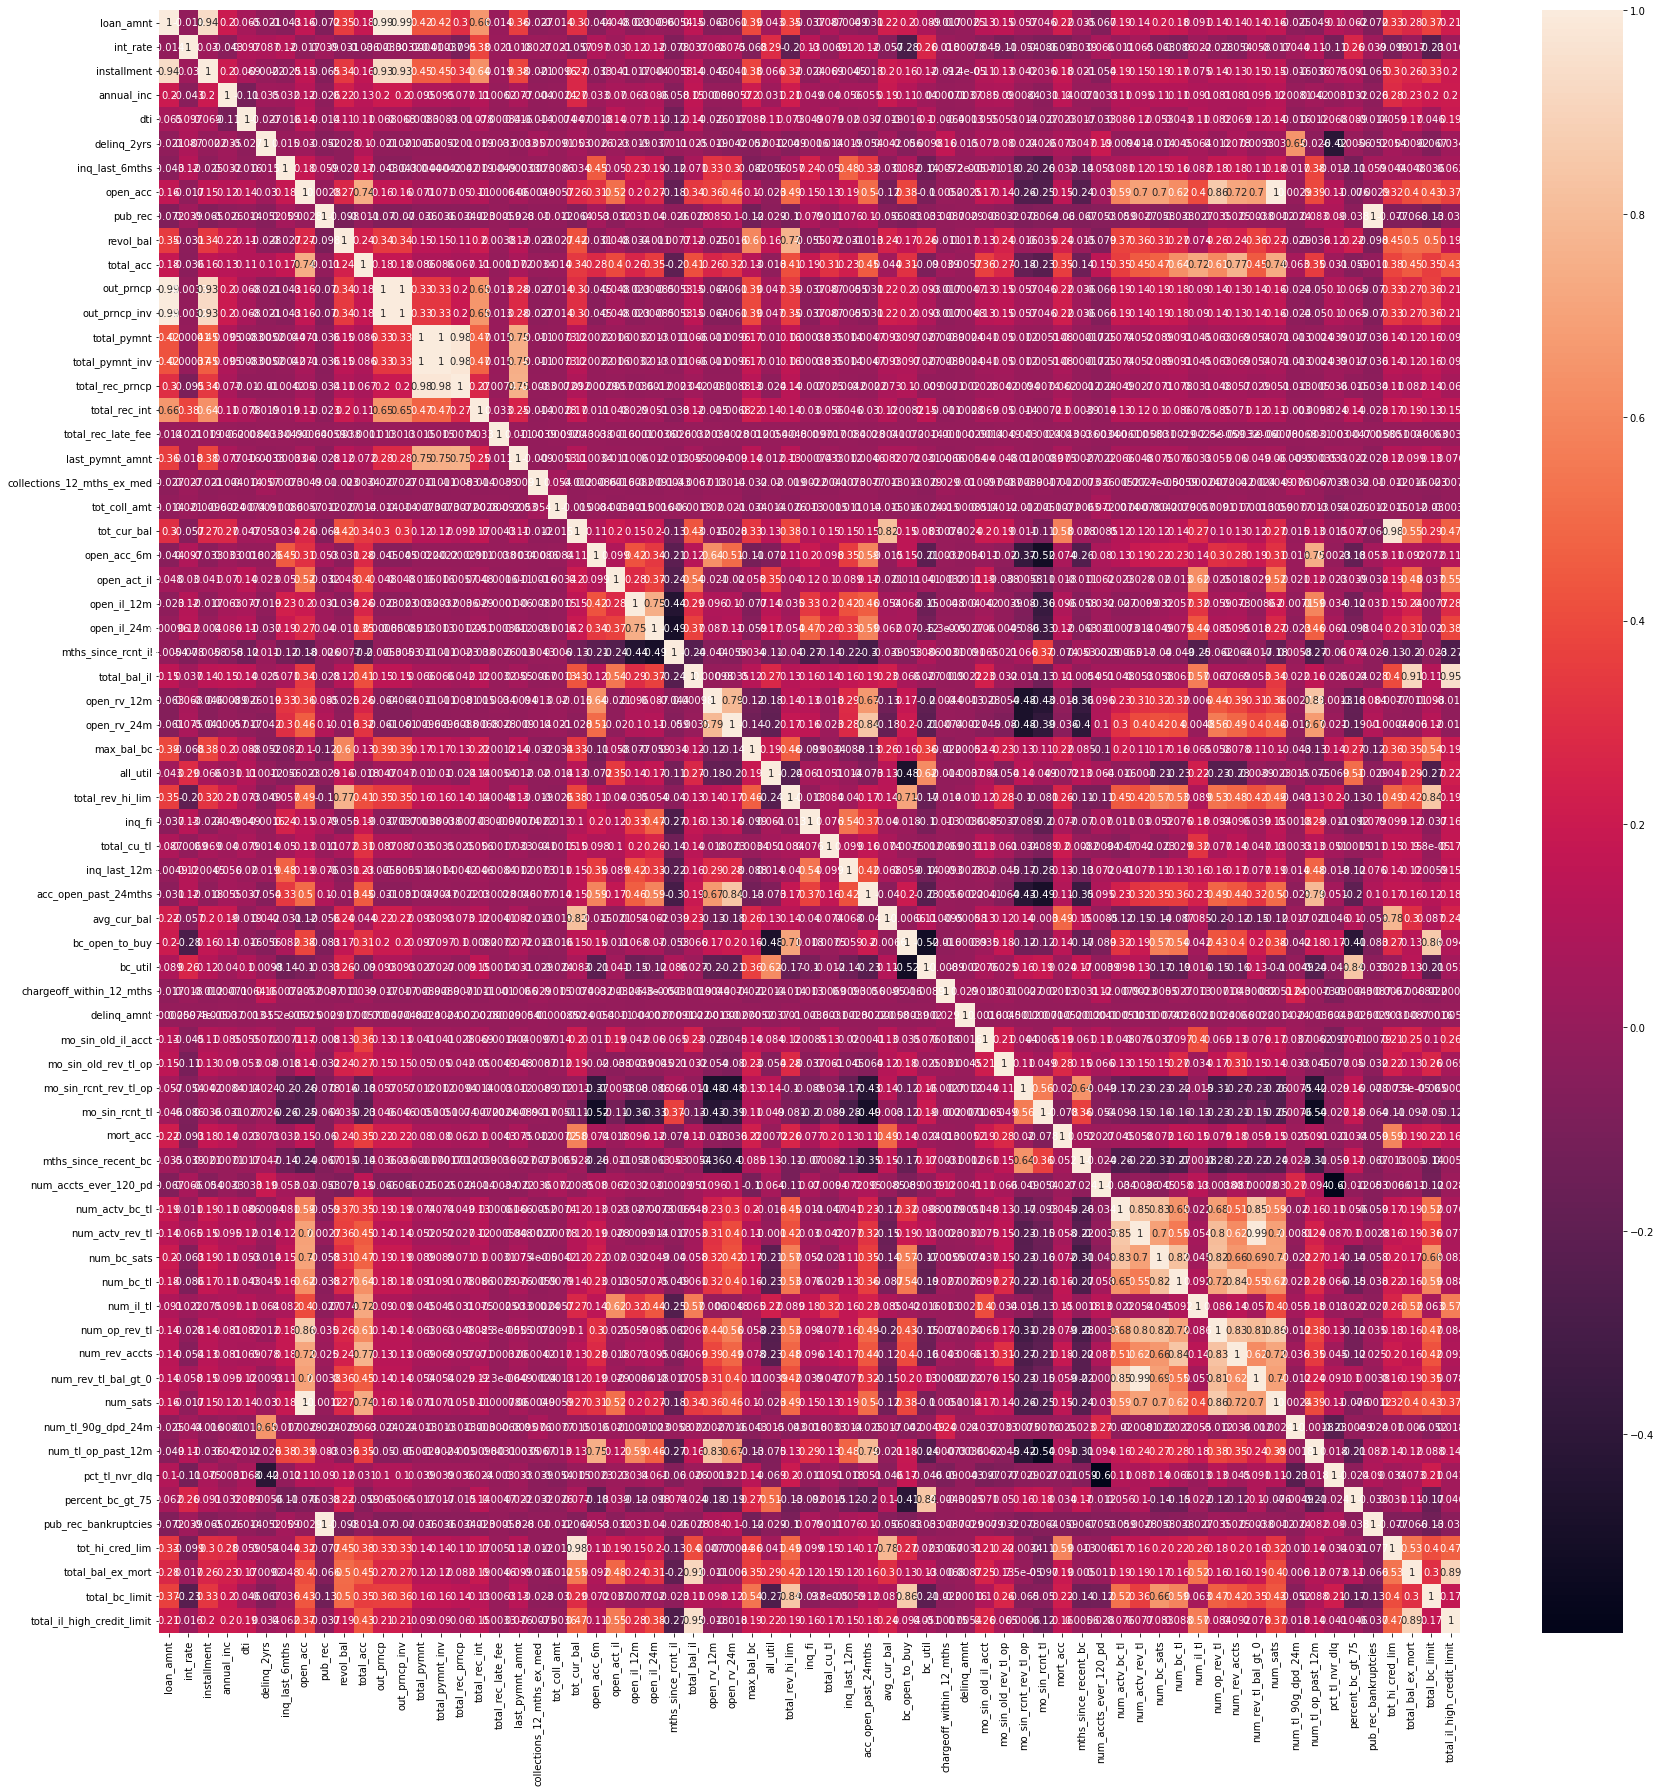

In [31]:
# check the correlation between different variables
plt.figure(figsize=(25,25))
sns.heatmap(clean_loans_df.corr(),cbar=True,annot=True)
# set cmap='Blues' or other color if preferred

# Note: 
# * Positive Correlation is dark
# * Negative Correlation is lighter
# * White is the identity matrix

plt.tight_layout()
plt.savefig("./Images/feature_matrix_correlation_heatmap.png")


Note: 
* Positive Correlation is dark
* Negative Correlation is lighter
* White is the identity matrix

### Follow-up: This would be good to review using the feature_importance_ dataframe from BalancedRandomForestClassifier


#### Explore high_risk vs low_risk loans

In [32]:
#### Explore the sum of high_risk loans to low_risk loans using groupby and sum as the method of aggregation
# keep just the loan_amnt column
loans_grouped = loans_df.groupby("loan_status").sum()['loan_amnt']
loans_grouped = loans_grouped.apply(lambda x: format(x, ',.0f'))
print(f"High risk loans account for a total of ${loans_grouped[0]} so even a small reduction might be benefitical")

High risk loans account for a total of $7,823,350 so even a small reduction might be benefitical


#### Explore variable distribution using a histogram

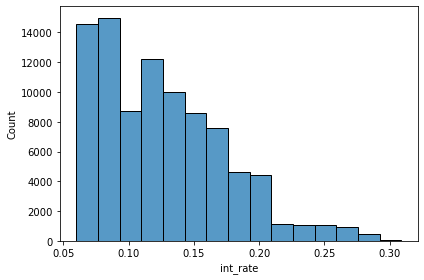

In [33]:
# what is the distribution of int_rate?
sns.histplot(clean_loans_df.int_rate, bins=15)
plt.tight_layout()
plt.savefig("./Images/int_rate_histogram.png")

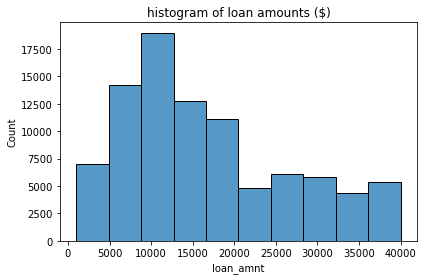

In [34]:
# what is the distribution of loans by loan_amnt?
sns.histplot(clean_loans_df.loan_amnt, bins=10)
plt.title("histogram of loan amounts ($)")

plt.tight_layout()
plt.savefig("./Images/loan_amnt_histogram.png")

#### Explore the relationship between multiple varialbes - using a stacked bar chart

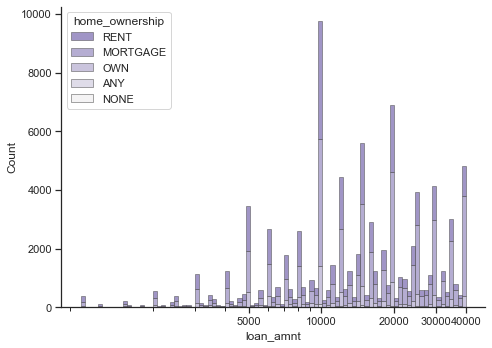

In [35]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    clean_loans_df,
    x="loan_amnt", hue="home_ownership",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5000, 10000, 20000, 30000, 40000])

plt.tight_layout()
plt.savefig("./Images/loan_amnt_by_home_ownership_barchar.png")

#### Explore the relationship between multiple varialbes - using a scatter plot

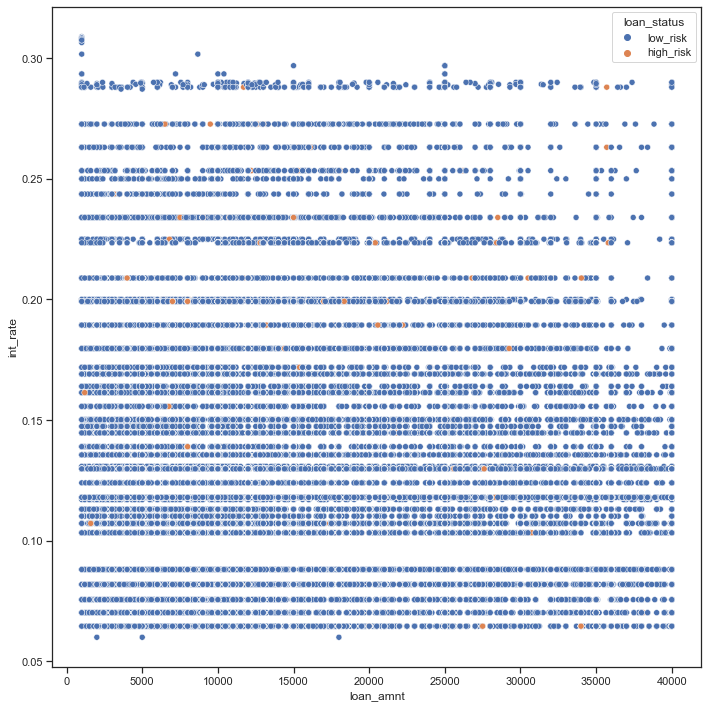

In [36]:
# what is the relationship between loan_amnt and int_rate
plt.figure(figsize=(10,10))
sns.scatterplot(data=clean_loans_df, x='loan_amnt',y='int_rate', hue="loan_status")
#plt.scatter(x='total_rec_int',y='last_pymnt_amnt',data=clean_loans_df)
plt.xlabel('loan_amnt')
plt.ylabel('int_rate')

plt.tight_layout()
plt.savefig("./Images/loan_amnt_vs_int_rate_by_loan_status_scatterplot.png")

#### Compare the distribution of a variable (int_rate) by another discrete factor (loan_status)  - using a boxplot

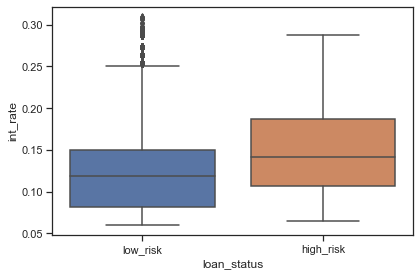

In [37]:
# what is the distribution of int_rate to loan_status?
# view as a box plot 
ax = sns.boxplot(x="loan_status", y="int_rate", data=clean_loans_df)

plt.tight_layout()
plt.savefig("./Images/int_rate_by_loan_status_boxplot.png")

#### Explore the relationship between a continuos variable (loan_amt) and a discrete variable (loan_status) by a third discrete variable (home_ownership) - a violin plot

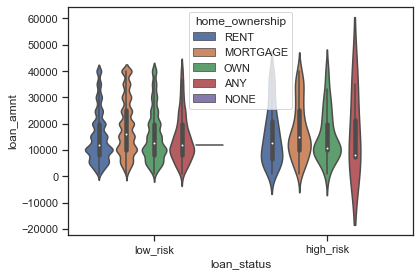

In [38]:
# what is the distribution of loan amounts (last_pymnt_amnt) loan_status by home_ownership?
# view as a violin plot
ax = sns.violinplot(x="loan_status", y="loan_amnt", hue='home_ownership', data=clean_loans_df)
# ax = sns.boxplot(x="loan_status", y="loan_amnt", hue='home_ownership', data=clean_loans_df)

plt.tight_layout()
plt.savefig("./Images/loan_amount_by_loan_status_and_home_ownership_violinplot.png")

#### Explore the relationship between a continuos variable (loan_amt) and a discrete variable (loan_status) by a third discrete variable (home_ownership) - a violin plot

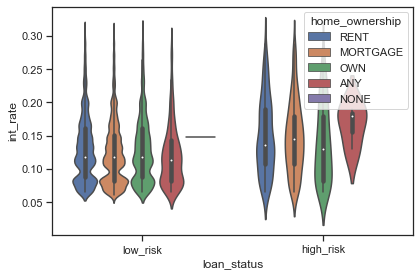

In [39]:
# what is the distribution of loan amounts (last_pymnt_amnt) loan_status by home_ownership?
# view as a violin plot
ax = sns.violinplot(x="loan_status", y="int_rate", hue='home_ownership', data=clean_loans_df)
# ax = sns.boxplot(x="loan_status", y="loan_amnt", hue='home_ownership', data=clean_loans_df)

plt.tight_layout()
plt.savefig("./Images/int_rate_by_loan_status_and_home_ownership_violinplot.png")

#### Other plot ideas

In [40]:
# What is the difference amont risk by issued date 
clean_loans_df["issue_d"].value_counts()

Jan-2019    40591
Feb-2019    33758
Mar-2019    16096
Name: issue_d, dtype: int64

#### Explore the relationship between a continuos variable (loan_amnt) and a discrete variable (issued_d) by a third discrete variable (loan_status) - a violin plot

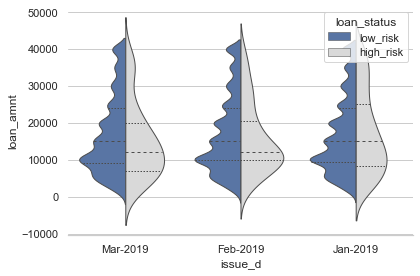

In [41]:
sns.set_theme(style="whitegrid")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=clean_loans_df, x="issue_d", y="loan_amnt", hue="loan_status",
               split=True, inner="quart", linewidth=1,
               palette={"low_risk": "b", "high_risk": ".85"})
sns.despine(left=True)

plt.tight_layout()
plt.savefig("./Images/loan_amnt_by_issue_d_by_loan_status_violinplot.png")

#### Examine the relationship between two variables using a scatter plot

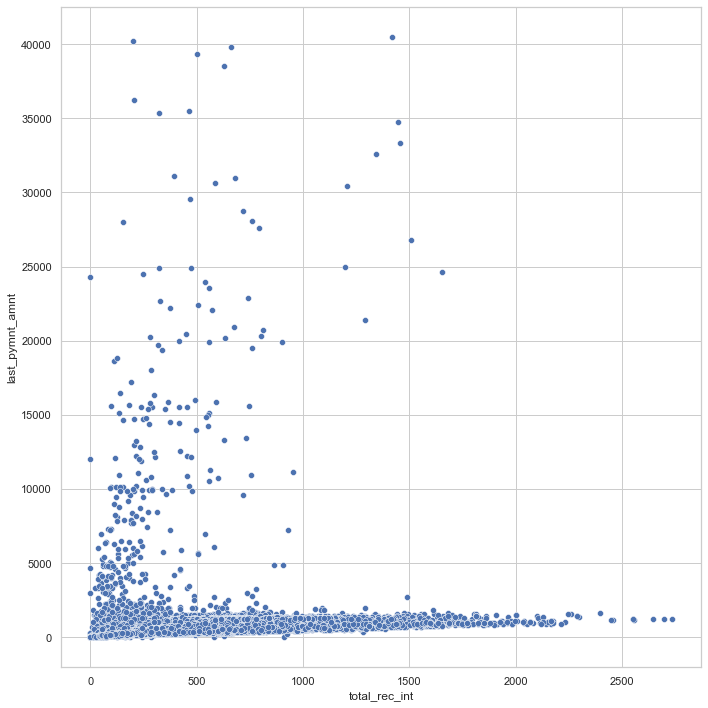

In [42]:
# what is the relationship between loan_amnt and int_rate
plt.figure(figsize=(10,10))
sns.scatterplot(data=clean_loans_df, x='total_rec_int',y='last_pymnt_amnt')
#plt.scatter(x='total_rec_int',y='last_pymnt_amnt',data=clean_loans_df)
plt.xlabel('total_rec_int')
plt.ylabel('last_pymnt_amnt')

plt.tight_layout()
plt.savefig("./Images/total_rec_int_vs_last_pymnt_amnt_scatterplot.png")

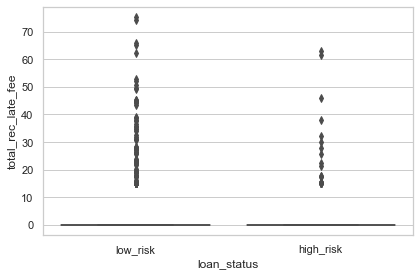

In [43]:
# what is the distribution of late fees received to date to loan_status?
# view as a box plot 
ax = sns.boxplot(x="loan_status", y="total_rec_late_fee", data=clean_loans_df)

plt.tight_layout()
plt.savefig("./Images/distribution_total_rec_late_fee_by_loan_status_boxplot.png")

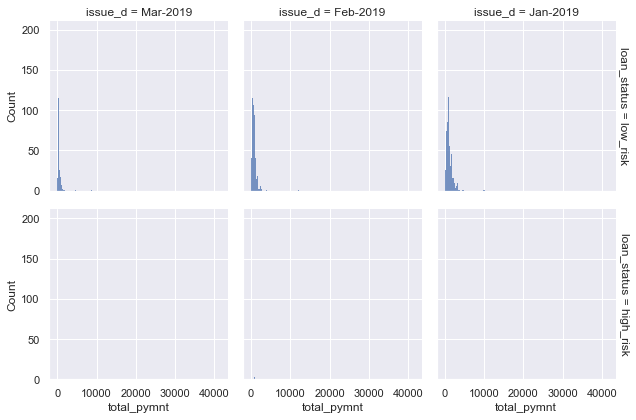

In [44]:
# from the seaborn gallery
# https://seaborn.pydata.org/examples/faceted_histogram.html
# this viz is not as beneficial for a highly imballanced dataset
sns.set_theme(style="darkgrid")

sns.displot(
    clean_loans_df, x="total_pymnt", col="issue_d", row="loan_status",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

plt.tight_layout()
plt.savefig("./Images/total_pymnt_by_loan_status_facetgrid.png")

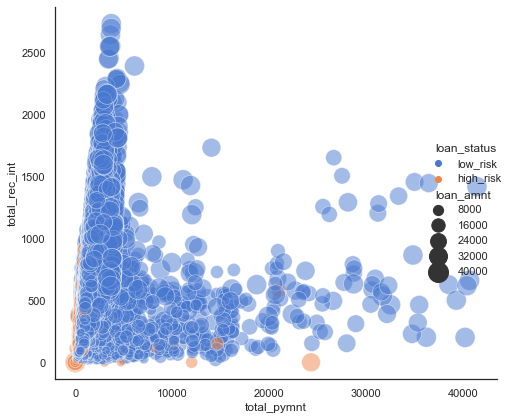

In [45]:
# relationship between int rate and total payment by issue date
sns.set_theme(style="white")

sns.relplot(x="total_pymnt", y="total_rec_int", hue="loan_status", size="loan_amnt",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=clean_loans_df)

plt.tight_layout()
plt.savefig("./Images/total_pymnt_vs_total_rec_int_by_loan_status_scatterplot.png")

## End Exploritory Data Analysis